In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

In [3]:
gdp_df = pd.read_csv('data/GDP by Country 1999-2022.csv')
print(gdp_df.shape)
gdp_df.head()

(180, 24)


,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,11.513,13.318,15.406,19.248,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,11.131,11.726,11.797,13.808,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,126.889,134.797,154.843,177.83,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,67.608,69.708,87.718,118.426,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,1.074,1.18,1.196,1.322,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534


In [4]:
# Set the country name as index - useful for quickly looking up countries
gdp_df.set_index('Country', inplace=True)

# Convert data types into a proper format
gdp_df = gdp_df.replace(',','', regex=True)
gdp_df = gdp_df.astype(float)

print('data dimensions:', gdp_df.shape)
gdp_df.head()

data dimensions: (180, 23)


,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Rep. of.",0.000,0.000,0.000,4.084,4.585,5.971,7.309,8.399,9.892,11.513,13.318,15.406,19.248,21.555,24.304,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Albania,3.444,3.695,4.096,4.456,5.600,7.452,8.376,9.133,10.163,11.131,11.726,11.797,13.808,14.910,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.770,18.012
Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.380,114.322,116.158,126.889,134.797,154.843,177.830,190.432,203.449,175.077,181.710,192.256,202.179,210.906,219.160,163.812,168.195
Angola,6.153,9.135,8.936,11.386,13.956,19.800,30.632,43.759,55.370,67.608,69.708,87.718,118.426,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.150,70.339,74.953
Antigua and Barbuda,0.652,0.678,0.710,0.718,0.754,0.818,0.875,0.962,1.026,1.074,1.180,1.196,1.322,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534


In [5]:
# Get the data
df_can = pd.DataFrame(gdp_df.loc['Canada'])

# Reset the index to put in back in as a column in the df_can dataframe
df_can.reset_index(inplace = True)

# Rename columns
df_can.columns = ['Year', 'Canada']

# Correct data types 
df_can['Year'] = df_can['Year'].astype(int)

# View the final dataframe
df_can.head()

,Year,Canada
0,1999,661.345
1,2000,725.158
2,2001,715.632
3,2002,734.773
4,2003,868.485


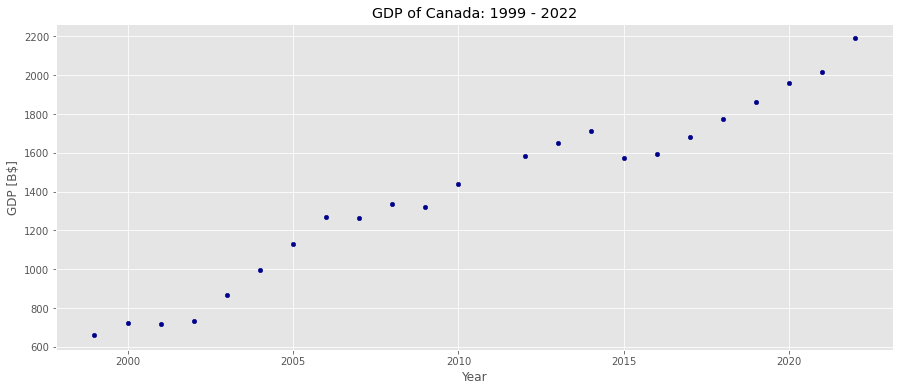

In [6]:
mpl.style.use('ggplot')
df_can.plot(kind='scatter',
            x='Year', 
            y='Canada', 
            figsize=(15, 6), 
            color='darkblue'
)

plt.title('GDP of Canada: 1999 - 2022')
plt.xlabel('Year')
plt.ylabel('GDP [B$]')
plt.show()

In [7]:
# year on x-axis
x = df_can['Year']      
# Canada on y-axis
y = df_can['Canada']     
fit = np.polyfit(x, y, deg=1)
fit

array([ 6.12254106e+01, -1.21698685e+05])

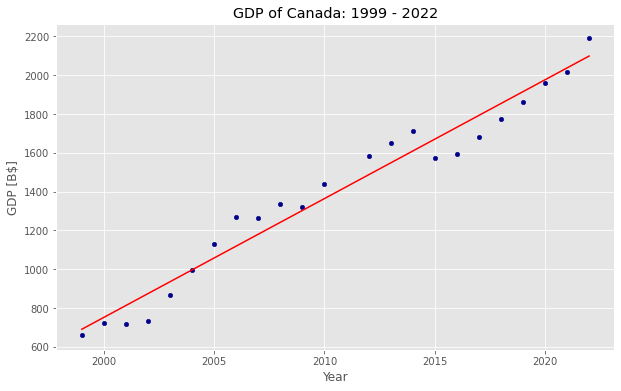

'GDP = 61 * Year + -121699'

In [8]:
df_can.plot(kind='scatter', 
            x='Year', 
            y='Canada', 
            figsize=(10, 6), 
            color='darkblue'
)

plt.title('GDP of Canada: 1999 - 2022')
plt.xlabel('Year')
plt.ylabel('GDP [B$]')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'GDP = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

In [9]:
# Transposed dataframe
gdp_df_t = gdp_df.transpose()
# cast the Years (the index) to type int
gdp_df_t.index = map(int, df_can['Year'])
# let's label the index
gdp_df_t.index.name = 'Year'
# reset index to bring the Year in as a column
gdp_df_t.reset_index(inplace=True)
# view the changes
gdp_df_t.head()

Country,Year,"Afghanistan, Rep. of.",Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Democratic Republic of","Congo, Republic of",Costa Rica,Côte d'Ivoire,Croatia,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong SAR,Hungary,Iceland,India,Indonesia,"Iran, Islamic Republic of",Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Korea,Kuwait,Kyrgyz Republic,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,"Macedonia, Former Yugoslav Republic of",Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Mongolia,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Samoa,São Tomé and Príncipe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,South Africa,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan Province of China,Tajikistan,Tanzania,Thailand,"Timor-Leste, Dem. Rep. of",Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Yemen, Republic of",Zambia,Zimbabwe
0,1999,0.000,3.444,48.845,6.153,0.652,283.523,1.845,401.782,213.390,4.581,4.704,6.617,46.529,2.478,12.104,253.889,0.732,2.492,0.430,8.298,4.995,5.629,586.922,4.600,12.977,3.015,0.808,3.516,10.424,661.345,0.597,1.039,1.537,72.995,1083.28,86.186,0.223,4.319,2.354,15.797,12.573,19.906,9.780,60.192,174.172,0.541,0.265,17.601,16.674,89.942,12.465,0.738,0.730,5.571,7.604,1.868,130.948,1456.80,4.669,0.432,2.803,2146.43,7.710,158.291,0.380,18.316,3.461,0.224,0.696,3.972,5.374,163.288,48.044,8.681,440.760,154.705,104.656,96.667,108.285,1202.40,7.316,4384.27,8.149,16.955,12.883,0.054,445.557,30.123,1.267,1.473,7.289,17.010,0.919,0.400,33.957,10.840,21.216,3.675,3.723,1.776,79.148,0.589,2.921,3.646,1.195,4.193,480.593,1.171,0.906,35.249,4.091,8.487,3.384,5.034,411.997,56.993,3.740,2.021,37.331,159.093,15.711,71.248,11.456,3.462,7.301,51.553,76.157,167.942,121.823,12.393,35.729,195.907,1.909,0.218,0.047,161.172,5.151,0.000,0.623,0.669,82.611,20.602,26.753,0.332,133.105,618.691,15.657,0.305,0.671,0.332,10.723,0.886,1.377,253.881,265.230,16.834,298.825,1.087,8.635,122.630,0.270,1.529,0.155,6.808,20.760,181.690,3.857,6.008,31.569,55.181,1467.03,9268.43,20.913,17.041,0.251,97.977,28.684,7.530,3.132,5.963
1,2000,0.000,3.695,54.749,9.135,0.678,284.204,1.912,390.017,194.407,5.273,5.004,7.966,47.048,2.559,12.758,232.934,0.832,2.383,0.460,8.412,5.298,6.193,644.283,6.001,12.639,2.611,0.709,3.655,10.046,725.158,0.539,0.962,1.389,75.210,1198.48,83.786,0.202,4.303,3.220,15.947,10.448,18.427,9.317,56.717,160.533,0.556,0.269,20.059,15.934,99.155,13.134,1.231,0.638,5.627,7.900,1.653,122.222,1333.04,5.096,0.421,3.042,1905.80,4.977,146.549,0.410,19.288,3.112,0.216,0.712,3.514,5.954,168.754,47.958,8.678,461.329,165.521,96.440,96.609,121.000,1100.56,7.467,4668.79,8.461,18.275,12.316,0.047,511.961,37.721,1.368,1.735,7.833,16.822,0.828,0.529,36.125,11.418,20.329,3.583,3.866,1.743,90.320,0.624,2.674,3.571,1.081,4.522,580.791,1.289,0.947,33.335,3.719,8.905,3.416,5.494,386.204,52.414,3.939,1.803,45.737,168.671,19.868,74.080,11.621,3.528,7.095,53.323,75.912,171.319,112.980,17.760,

In [10]:
# Normalize UK data
norm_uk = (gdp_df_t['United Kingdom'] - gdp_df_t['United Kingdom'].min()) / (gdp_df_t['United Kingdom'].max() - gdp_df_t['United Kingdom'].min())

# Normalize France data
norm_france = (gdp_df_t['France'] - gdp_df_t['France'].min()) / (gdp_df_t['France'].max() - gdp_df_t['France'].min())

# Normalize Germany data
norm_germany = (gdp_df_t['Germany'] - gdp_df_t['Germany'].min()) / (gdp_df_t['Germany'].max() - gdp_df_t['Germany'].min())

# Normalize Italy data
norm_italy = (gdp_df_t['Italy'] - gdp_df_t['Italy'].min()) / (gdp_df_t['Italy'].max() - gdp_df_t['Italy'].min())

# Normalize Netherlands data
norm_netherlands = (gdp_df_t['Netherlands'] - gdp_df_t['Netherlands'].min()) / (gdp_df_t['Netherlands'].max() - gdp_df_t['Netherlands'].min())

# Normalize Spain data
norm_spain = (gdp_df_t['Spain'] - gdp_df_t['Spain'].min()) / (gdp_df_t['Spain'].max() - gdp_df_t['Spain'].min())

# Normalize Russia data
norm_russia = (gdp_df_t['Russia'] - gdp_df_t['Russia'].min()) / (gdp_df_t['Russia'].max() - gdp_df_t['Russia'].min())

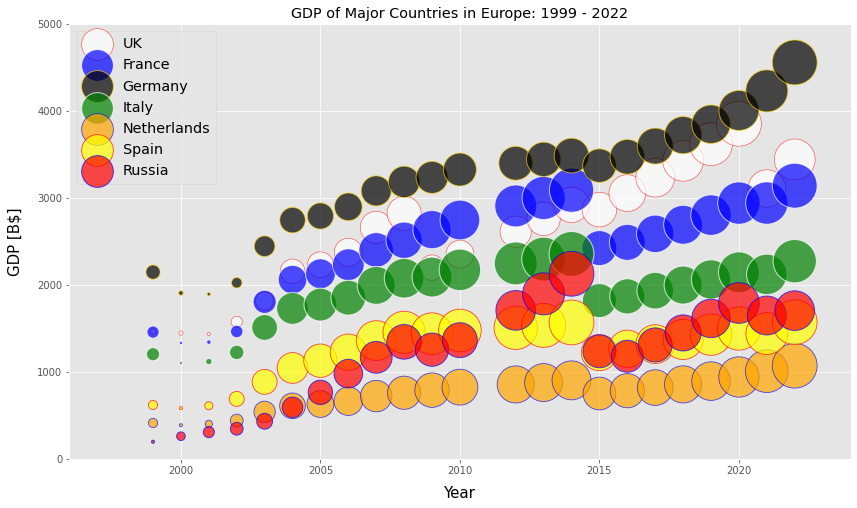

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))

# UK
sns.scatterplot(data=gdp_df_t,
                x='Year',
                y='United Kingdom',
                alpha=0.7,                  # transparency
                color='white',
                edgecolor='red',
                s=norm_uk * 2000 + 10,  # pass in weights 
                ax=ax
                )

# France
sns.scatterplot(data=gdp_df_t,
                x='Year',
                y='France',
                alpha=0.7,
                color='blue',
                edgecolor='white',
                s=norm_france * 2000 + 10,
                ax=ax
                )

# Germany
sns.scatterplot(data=gdp_df_t,
                x='Year',
                y='Germany',
                alpha=0.7,                  
                color='black',
                edgecolor='gold',
                s=norm_germany * 2000 + 10,  
                ax=ax
                )

# Italy
sns.scatterplot(data=gdp_df_t,
                x='Year',
                y='Italy',
                alpha=0.7,
                color='green',
                edgecolor='white',
                s=norm_italy * 2000 + 10,
                ax=ax
                )

# Netherlands
sns.scatterplot(data=gdp_df_t,
                x='Year',
                y='Netherlands',
                alpha=0.7,
                color='orange',
                edgecolor='blue',
                s=norm_netherlands * 2000 + 10,
                ax=ax
                )

# Spain
sns.scatterplot(data=gdp_df_t,
                x='Year',
                y='Spain',
                alpha=0.7,
                color='yellow',
                edgecolor='red',
                s=norm_spain * 2000 + 10,
                ax=ax
                )

# Russia
sns.scatterplot(data=gdp_df_t,
                x='Year',
                y='Russia',
                alpha=0.7,
                color='red',
                edgecolor='blue',
                s=norm_russia * 2000 + 10,
                ax=ax
                )

ax.set_xlim([1996, 2024])
ax.set_ylim([0, 5000])
ax.legend(['UK', 'France', 'Germany', 'Italy', 'Netherlands', 'Spain', 'Russia'], loc='upper left', fontsize='x-large')
ax.set_title('GDP of Major Countries in Europe: 1999 - 2022')
plt.xlabel('Year', fontsize=15, color='black', labelpad=10)
plt.ylabel('GDP [B$]', fontsize=15, color='black', labelpad=15)
plt.show()